# Principal Component Analysis with Cancer Data

In [10]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [276]:
# Feature description is available in "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)"

can_data=pd.read_csv('breast-cancer-wisconsin.data.txt')

# Dataset Description are from "breast-cancer-wisconsin.names"

can_data.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
with open('breast-cancer-wisconsin.names','r') as fh:
    all_lines=fh.readlines()

all_lines

['Citation Request:\n',
 '   This breast cancer databases was obtained from the University of Wisconsin\n',
 '   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results\n',
 '   when using this database, then please include this information in your\n',
 '   acknowledgements.  Also, please cite one or more of:\n',
 '\n',
 '   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear \n',
 '      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.\n',
 '\n',
 '   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of \n',
 '      pattern separation for medical diagnosis applied to breast cytology", \n',
 '      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, \n',
 '      December 1990, pp 9193-9196.\n',
 '\n',
 '   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition \n',
 '      via linear programming: Theory and application to medical diagnosis", \n',
 '      in: "Large-scale numerical 

In [277]:
can_data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [278]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [279]:
can_data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [280]:
can_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample code number             698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [281]:
can_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sample code number,698,NaN,NaN,NaN,1.07181e+06,617532,61634,870258,1.17171e+06,1.23835e+06,1.34544e+07
Clump Thickness,698,NaN,NaN,NaN,4.41691,2.81767,1,2,4,6,10
Uniformity of Cell Size,698,NaN,NaN,NaN,3.13754,3.05258,1,1,1,5,10
Uniformity of Cell Shape,698,NaN,NaN,NaN,3.2106,2.97287,1,1,1,5,10
Marginal Adhesion,698,NaN,NaN,NaN,2.80946,2.85661,1,1,1,4,10
Single Epithelial Cell Size,698,NaN,NaN,NaN,3.21777,2.21541,1,2,2,4,10
Bare Nuclei,698,11,1,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bland Chromatin,698,NaN,NaN,NaN,3.4384,2.44006,1,2,3,5,10
Normal Nucleoli,698,NaN,NaN,NaN,2.86963,3.055,1,1,1,4,10
Mitoses,698,NaN,NaN,NaN,1.59026,1.71616,1,1,1,1,10


In [282]:
# From the info/describe, we can observe tha "Bare Nuclei " is in obeject datatype 
#and need to identify the non-numerical values present in further steps.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [283]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [284]:
error=[]
j=len(can_data['Uniformity of Cell Size'])
for col in can_data.columns:
    for j in range(0,j,1):
        try:
            k=can_data[col][j]
            int(k)
        except Exception:
            error.append([k,col,j])

print('Non-Numerical "',error[0][0],'" Observations are present in the variable "',error[0][1],'"')

Non-Numerical " ? " Observations are present in the variable " Bare Nuclei "


In [285]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [286]:
can_data['Bare Nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [287]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [288]:
# Replaced with mode of the feature i.e.. "1"
can_data['Bare Nuclei']=can_data['Bare Nuclei'].map(lambda x:1 if x=='?'else x)
can_data['Bare Nuclei']=can_data['Bare Nuclei'].astype('int64')
can_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample code number             698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null int64
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [289]:
# Check for correlation of variable

   Class  count      prop
0      2    457  0.654728
1      4    241  0.345272


<function matplotlib.pyplot.show(*args, **kw)>

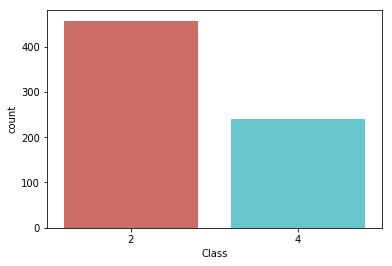

In [290]:
# ploting the data distribution for the target columns "Calss", 2 for benign, 4 for malignant
freq = can_data['Class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print(freq)
sns.countplot(x='Class',data=can_data,palette='hls')
plt.show

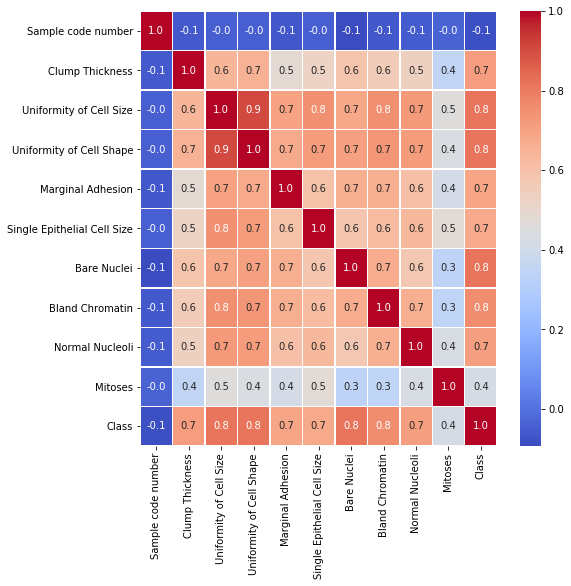

In [291]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(can_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap = "coolwarm")

In [292]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [293]:
#Let us check for pair plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


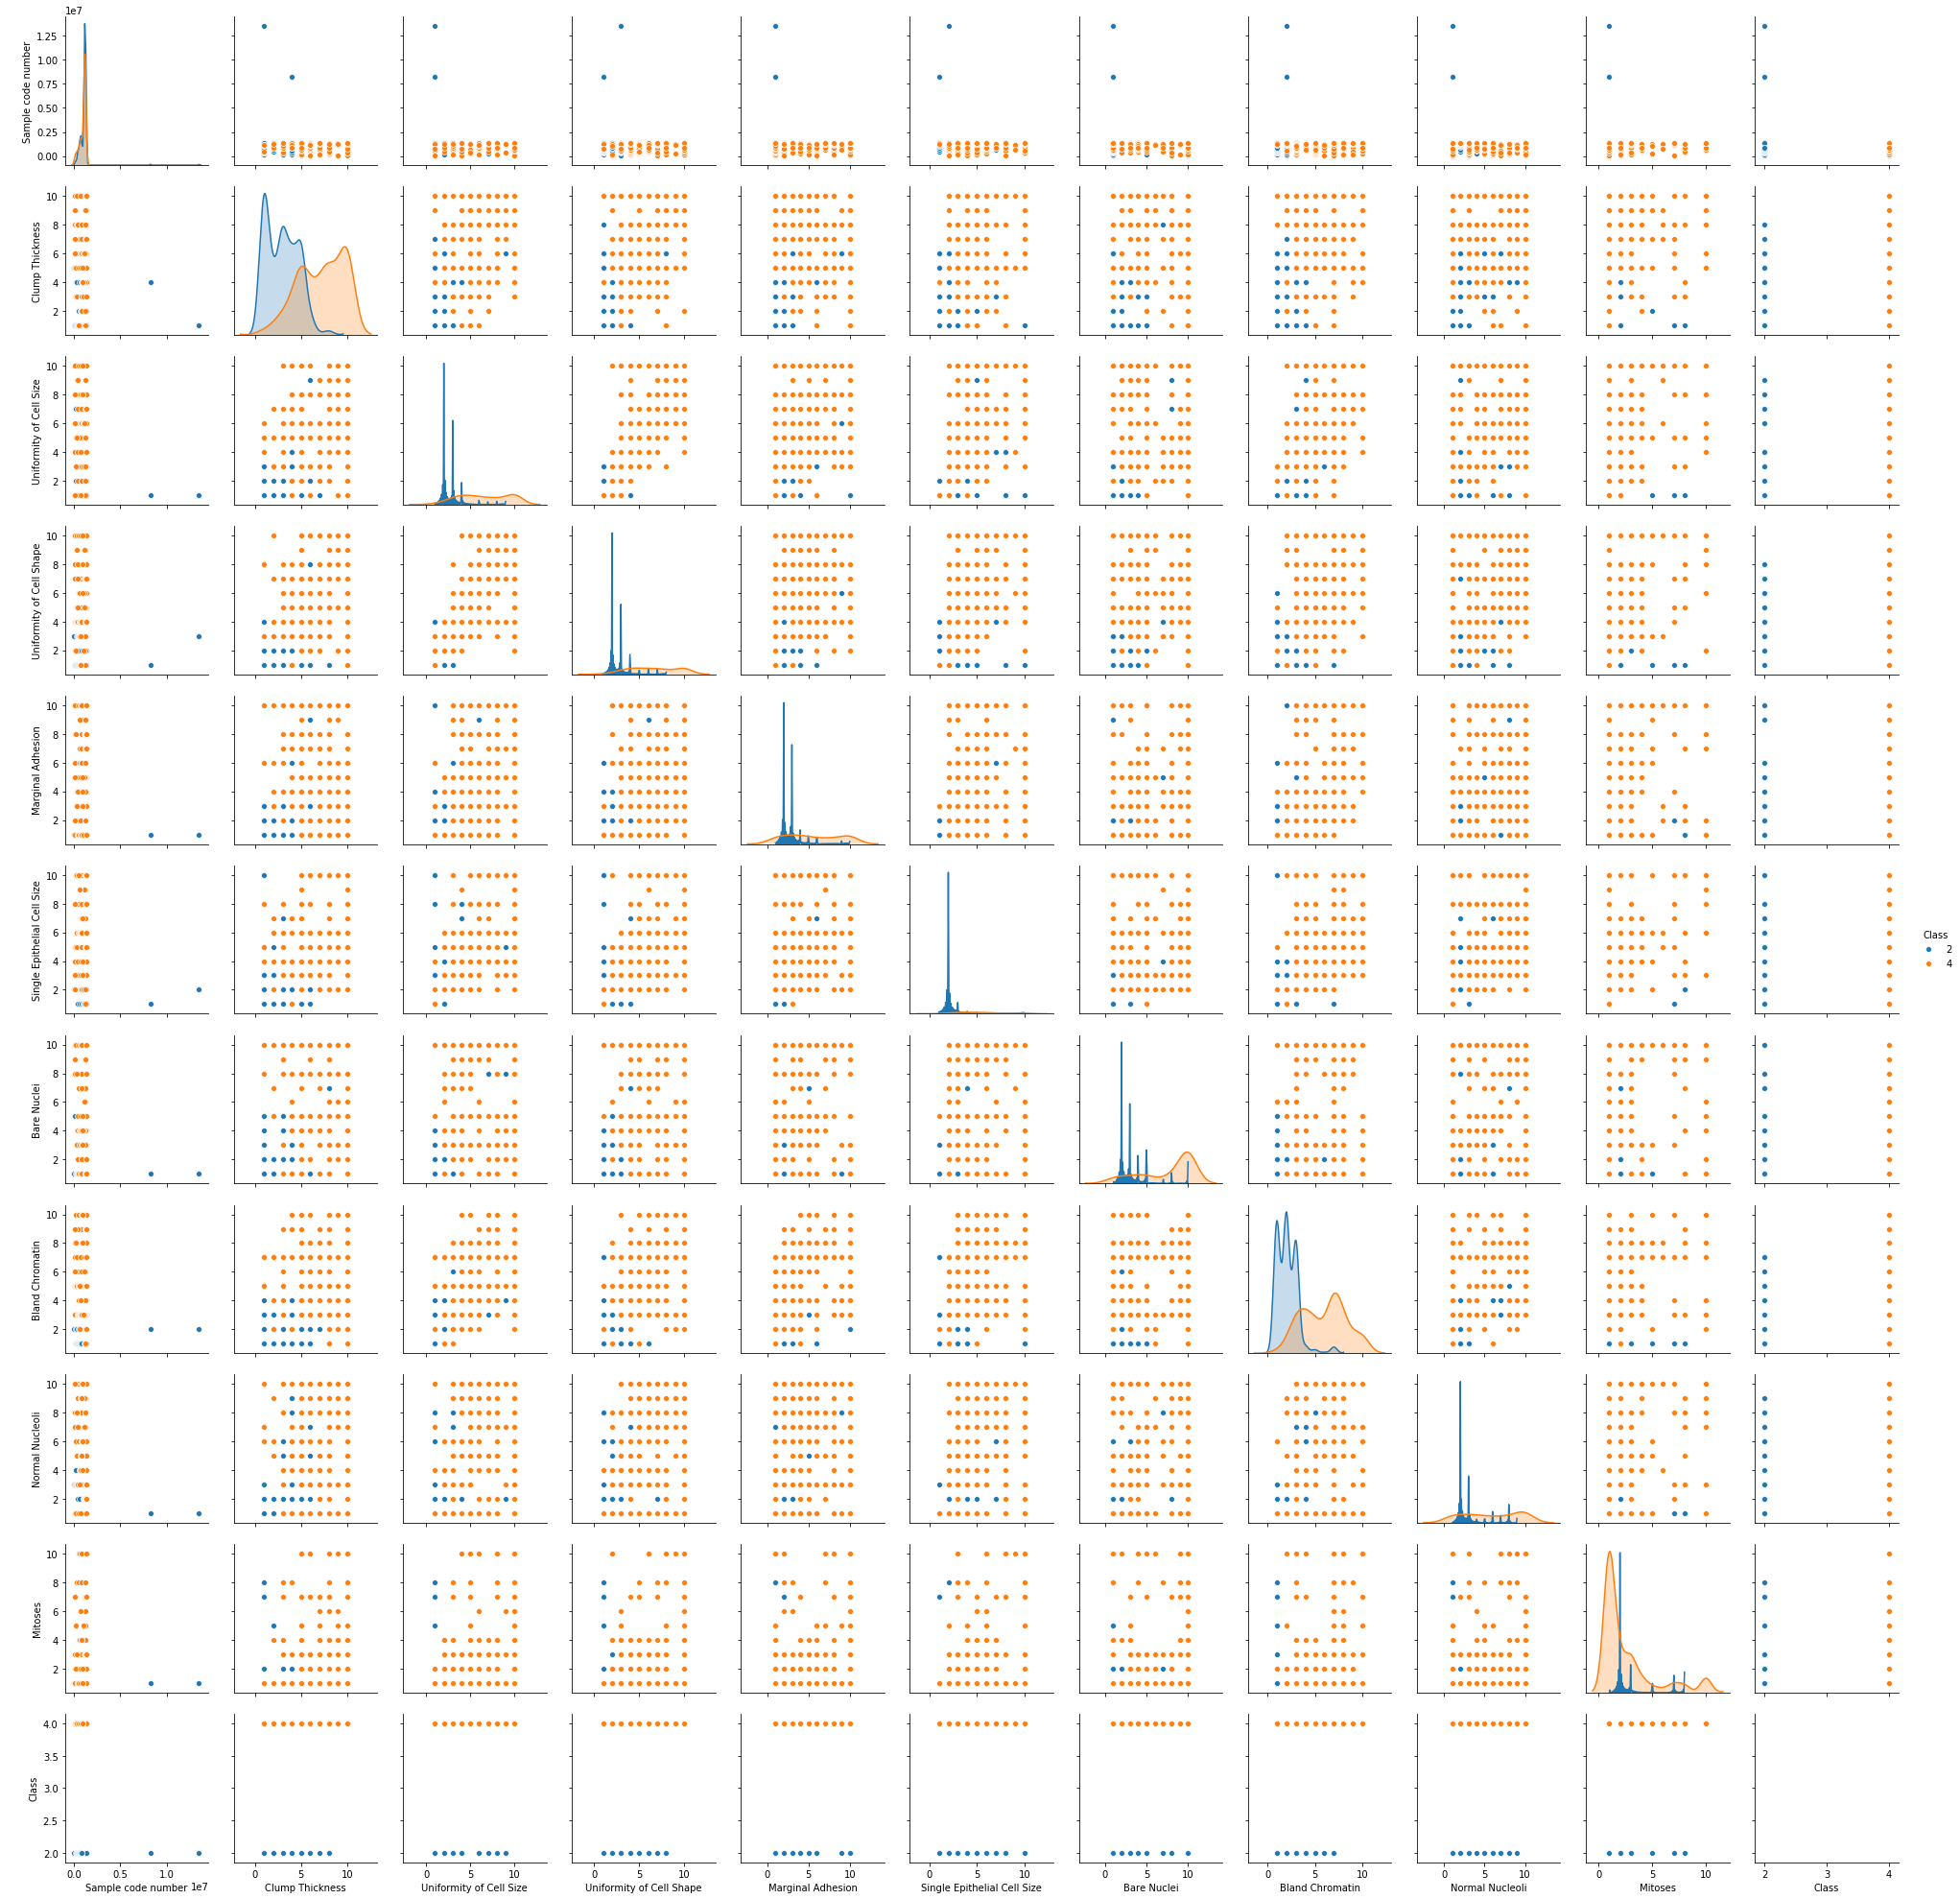

In [294]:
sns.pairplot(can_data, diag_kind='kde', hue = 'Class')

In [295]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [296]:
# Removing the "Sample code number, Class" as this is a referance/unique identifier feature
can_data_st=can_data.drop(columns=['Sample code number','Class'])

In [297]:
can_data_st.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [298]:
# We could see most of the outliers are now removed.

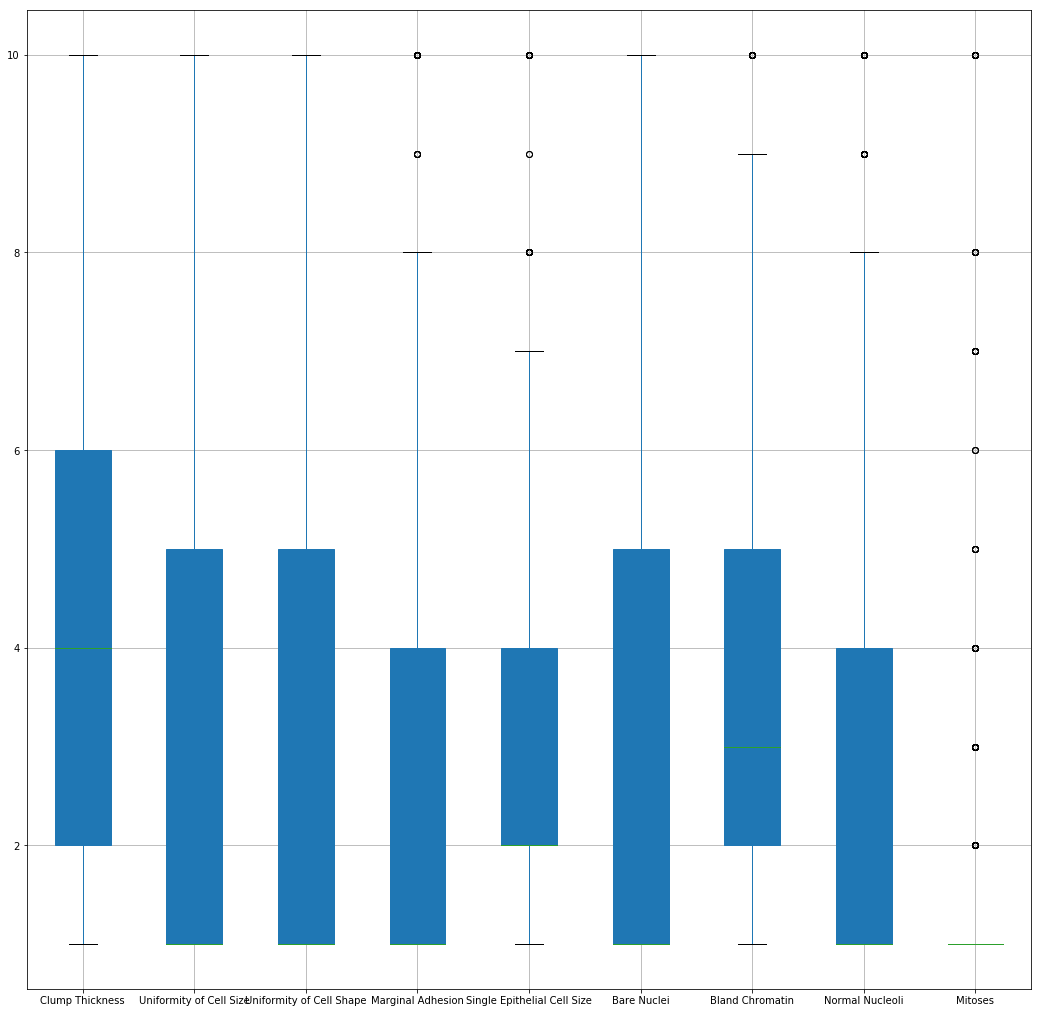

In [299]:
can_data_st.boxplot(figsize=(18,18),patch_artist=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

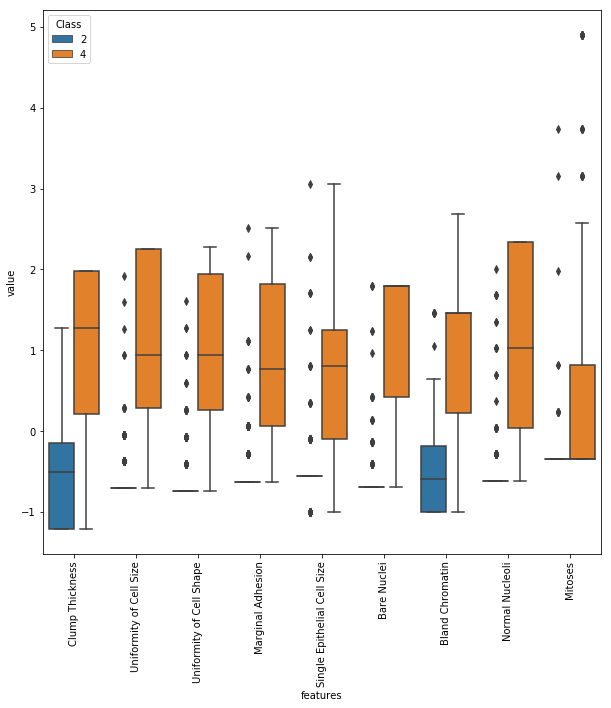

In [300]:
# first ten features
data_dia = can_data['Class']
data = can_data.drop(columns=['Sample code number','Class'])
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Class", data=data)
plt.xticks(rotation=90)

In [301]:
c_dat = can_data_st
#Removing outliers
def IQR_outliers_detect(column):
    q1 = c_dat[column].quantile(.25)
    q3 = c_dat[column].quantile(.75)
    IQR = q3-q1
    print("IQR : {}".format(IQR))
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    print("upper cap : {}".format(upper))
    print("lower cap : {}".format(lower))

In [302]:
# Checking for upper and lower cap for per features with ourtliers
print(IQR_outliers_detect('Mitoses'))
print(IQR_outliers_detect('Normal Nucleoli'))
print(IQR_outliers_detect('Single Epithelial Cell Size'))
print(IQR_outliers_detect('Marginal Adhesion'))

IQR : 0.0
upper cap : 1.0
lower cap : 1.0
None
IQR : 3.0
upper cap : 8.5
lower cap : -3.5
None
IQR : 2.0
upper cap : 7.0
lower cap : -1.0
None
IQR : 3.0
upper cap : 8.5
lower cap : -3.5
None


In [303]:
# From the outliers we can observe that the  "Mitoses" has outliers, thus checking for response of target feature with "Cross tab"
print(pd.crosstab(can_data['Mitoses'],can_data['Class']))
print(pd.crosstab(can_data['Normal Nucleoli'],can_data['Class']))
print(pd.crosstab(can_data['Single Epithelial Cell Size'],can_data['Class']))
print(pd.crosstab(can_data['Marginal Adhesion'],can_data['Class']))

Class      2    4
Mitoses          
1        444  134
2          8   27
3          2   31
4          0   12
5          1    5
6          0    3
7          1    8
8          1    7
10         0   14
Class              2   4
Normal Nucleoli         
1                401  41
2                 30   6
3                 12  32
4                  1  17
5                  2  17
6                  4  18
7                  2  14
8                  4  20
9                  1  15
10                 0  61
Class                          2   4
Single Epithelial Cell Size         
1                             46   1
2                            362  23
3                             29  43
4                              7  41
5                              5  34
6                              2  39
7                              3   9
8                              2  19
9                              0   2
10                             1  30
Class                2   4
Marginal Adhesion         
1   

In [304]:
# From the response "Crosstab", i am clubbing the outlier to "4" for "Mitoses" feature only
can_data_st['Mitoses']=can_data_st['Mitoses'].map(lambda x: 4 if x>=5<9 else x)
can_data_st['Mitoses'].value_counts()

1    578
4     52
2     35
3     33
Name: Mitoses, dtype: int64

In [305]:
#standardize the data
from scipy.stats import zscore
can_data_st= can_data_st.apply(zscore)

# Q6 Create a covariance matrix for identifying Principal components

In [306]:
# PCA
# Step 1 - Create covariance matrix


In [316]:
can_data_st.cov().T

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.001435,0.646292,0.656029,0.487397,0.522857,0.591277,0.559313,0.536945,0.408196
Uniformity of Cell Size,0.646292,1.001435,0.908115,0.706409,0.752753,0.687442,0.756908,0.723736,0.507642
Uniformity of Cell Shape,0.656029,0.908115,1.001435,0.683851,0.720556,0.708276,0.737122,0.720304,0.478562
Marginal Adhesion,0.487397,0.706409,0.683851,1.001435,0.600262,0.667721,0.667716,0.603998,0.476386
Single Epithelial Cell Size,0.522857,0.752753,0.720556,0.600262,1.001435,0.584321,0.616992,0.629606,0.496464
Bare Nuclei,0.591277,0.687442,0.708276,0.667721,0.584321,1.001435,0.675249,0.575349,0.435077
Bland Chromatin,0.559313,0.756908,0.737122,0.667716,0.616992,0.675249,1.001435,0.666870,0.393443
Normal Nucleoli,0.536945,0.723736,0.720304,0.603998,0.629606,0.575349,0.666870,1.001435,0.480453
Mitoses,0.408196,0.507642,0.478562,0.476386,0.496464,0.435077,0.393443,0.480453,1.001435


In [317]:
st=can_data_st.T

In [327]:
#covariance matrix
np.cov(st)

array([[1.00143472, 0.6462923 , 0.65602872, 0.48739701, 0.52285721,
        0.59127672, 0.55931278, 0.53694543, 0.40819566],
       [0.6462923 , 1.00143472, 0.90811469, 0.70640902, 0.7527529 ,
        0.68744174, 0.75690801, 0.72373557, 0.50764224],
       [0.65602872, 0.90811469, 1.00143472, 0.683851  , 0.72055597,
        0.70827594, 0.73712156, 0.72030428, 0.47856181],
       [0.48739701, 0.70640902, 0.683851  , 1.00143472, 0.60026232,
        0.66772134, 0.66771591, 0.60399765, 0.47638614],
       [0.52285721, 0.7527529 , 0.72055597, 0.60026232, 1.00143472,
        0.58432119, 0.61699188, 0.62960559, 0.49646351],
       [0.59127672, 0.68744174, 0.70827594, 0.66772134, 0.58432119,
        1.00143472, 0.67524886, 0.57534853, 0.43507749],
       [0.55931278, 0.75690801, 0.73712156, 0.66771591, 0.61699188,
        0.67524886, 1.00143472, 0.66686971, 0.39344312],
       [0.53694543, 0.72373557, 0.72030428, 0.60399765, 0.62960559,
        0.57534853, 0.66686971, 1.00143472, 0.48045331],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [357]:
w,v=np.linalg.eig(np.cov(st))

In [358]:
print('EigenValues:\n',w,'\n\nEiginVertor\n',v)

EigenValues:
 [5.96625664 0.69294666 0.08864204 0.54103256 0.48225803 0.38476203
 0.26225498 0.30669273 0.28806681] 

EiginVertor
 [[-0.30168911 -0.12555697  0.00394295  0.86657477 -0.01772834 -0.04362149
  -0.24272901  0.28292766  0.03269833]
 [-0.37850834 -0.08717696  0.73526887 -0.03707661  0.20229332  0.11858615
   0.45092553  0.10151648 -0.1962446 ]
 [-0.37448416 -0.13595275 -0.66527582  0.01912701  0.1747802   0.08844893
   0.5889808   0.03354544 -0.10920483]
 [-0.33128072 -0.01004462 -0.04186139 -0.38792592 -0.47606311  0.02666243
  -0.11829827  0.68448121  0.16750318]
 [-0.33315249  0.10490806 -0.06344691 -0.15978841  0.43580065  0.65233861
  -0.44699459 -0.09214878  0.15710646]
 [-0.33315321 -0.16885081  0.07572312  0.06086769 -0.57057484  0.14370435
   0.08290819 -0.60257608  0.36726174]
 [-0.34349839 -0.27408701 -0.06307593 -0.18622112 -0.08087823 -0.26688265
  -0.39859782 -0.22467542 -0.69361472]
 [-0.33395619  0.02363925  0.02364773 -0.15664683  0.39569263 -0.67055423
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [359]:
#Variance
print(w)
print(w.sum())

[5.96625664 0.69294666 0.08864204 0.54103256 0.48225803 0.38476203
 0.26225498 0.30669273 0.28806681]
9.012912482066001


In [360]:
#Cumulative Variance
w.sum()
EigenValues=w/w.sum()
np.cumsum(EigenValues)

array([0.66196767, 0.73885143, 0.74868644, 0.80871504, 0.8622225 ,
       0.90491259, 0.93401028, 0.96803843, 1.        ])

In [361]:
#From the Cumulative, i am considering the components as 7 (that is n_componenets as 7) with a target of 93% coverage

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [410]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(can_data_st)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [411]:
X_pca = pca.transform(can_data_st)

In [412]:
X_pca.shape

(698, 7)

In [413]:
pca.components_

array([[ 0.30168911,  0.37850834,  0.37448416,  0.33128072,  0.33315249,
         0.33315321,  0.34349839,  0.33395619,  0.25343695],
       [-0.12555697, -0.08717696, -0.13595275, -0.01004462,  0.10490806,
        -0.16885081, -0.27408701,  0.02363925,  0.91807014],
       [-0.86657477,  0.03707661, -0.01912701,  0.38792592,  0.15978841,
        -0.06086769,  0.18622112,  0.15664683, -0.09147335],
       [ 0.01772834, -0.20229332, -0.1747802 ,  0.47606311, -0.43580065,
         0.57057484,  0.08087823, -0.39569263,  0.151615  ],
       [-0.04362149,  0.11858615,  0.08844893,  0.02666243,  0.65233861,
         0.14370435, -0.26688265, -0.67055423, -0.09183935],
       [ 0.28292766,  0.10151648,  0.03354544,  0.68448121, -0.09214878,
        -0.60257608, -0.22467542, -0.08386982, -0.10442221],
       [-0.03269833,  0.1962446 ,  0.10920483, -0.16750318, -0.15710646,
        -0.36726174,  0.69361472, -0.49023056,  0.19860732]])

In [366]:
pca.explained_variance_

array([5.96625664, 0.69294666, 0.54103256, 0.48225803, 0.38476203,
       0.30669273, 0.28806681])

In [407]:
pca.explained_variance_ratio_

array([0.66196767, 0.07688377, 0.0600286 , 0.05350746, 0.04269009,
       0.03402815, 0.03196157])

# Q10 Find correlation between components and features

In [404]:
can_cor=pd.DataFrame(pca.components_)
can_cor.columns=can_data_st.columns
can_cor

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.301689,0.378508,0.374484,0.331281,0.333152,0.333153,0.343498,0.333956,0.253437
1,-0.125557,-0.087177,-0.135953,-0.010045,0.104908,-0.168851,-0.274087,0.023639,0.918070
2,-0.866575,0.037077,-0.019127,0.387926,0.159788,-0.060868,0.186221,0.156647,-0.091473
3,0.017728,-0.202293,-0.174780,0.476063,-0.435801,0.570575,0.080878,-0.395693,0.151615
4,-0.043621,0.118586,0.088449,0.026662,0.652339,0.143704,-0.266883,-0.670554,-0.091839
5,0.282928,0.101516,0.033545,0.684481,-0.092149,-0.602576,-0.224675,-0.083870,-0.104422
6,-0.032698,0.196245,0.109205,-0.167503,-0.157106,-0.367262,0.693615,-0.490231,0.198607


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [518]:
jokes_data=pd.read_csv('jokes.csv')
print(jokes_data.shape)
jokes_data.head()

(24983, 101)


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [519]:
ratings=jokes_data.drop(columns=['NumJokes'])
ratings=ratings.head(200)
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [520]:
ratings.columns=range(0,100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [525]:
rantings=ratings.replace(99,0,inplace=True)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [526]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ratings)
ratings_diff=pd.DataFrame(scaler.transform(ratings),columns=ratings.columns)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [529]:
mean_var=pd.DataFrame(ratings_diff.mean(axis=0))

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [530]:
mean_var.nlargest(10,mean_var[:])

,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
